In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## DAILY TEMPERATURE DATA 

In [28]:
weatherog=pd.read_csv("temperaturedfv1.csv")
weatherog.shape

(1794578, 7)

In [29]:
weatherog.columns

Index(['STATIONS_ID', 'MESS_DATUM', 'QN_3', 'AMR_key', 'TMK', 'TXK', 'TNK'], dtype='object')

In [30]:
#the og data has the station level data, to convert this to AMR level data, first take average of temperature 
#over all stations in every AMR.
amr_panel_temp=weatherog.groupby(by=["AMR_key","MESS_DATUM"]).mean().drop(["STATIONS_ID","QN_3"],axis=1)
amr_panel_temp_dims=amr_panel_temp.groupby(by="AMR_key").count() #gives number of observations in every AMR
print(amr_panel_temp.shape)
amr_panel_temp.reset_index(inplace=True)

(513315, 3)


In [31]:
print("There are ",amr_panel_temp_dims.shape[0]," Labour Market Regions in the Temperature Data" )

There are  47  Labour Market Regions in the Temperature Data


            amr_panel contains daily temperature data for every AMR (expected) from 01 Jan 1991 to 31 Dec 2021.
            Additional columns are incorporated that have indicators for month and for the day of the year, this
            is useful because temperature is non-stationary from its cyclical time trend.
            Also daily temperature is generally highly persistence, so having monthly indicators can bring the 
            analysis to monthly level. Also, can later be modified to add seasonal indicators.

In [32]:
amr_panel_temp["year"]=(amr_panel_temp["MESS_DATUM"]/10000).astype(int)
amr_panel_temp["month"]=((amr_panel_temp["MESS_DATUM"]%10000)/100).astype(int)
amr_panel_temp["day_of_year"]=amr_panel_temp.groupby(by=["AMR_key","year"]).cumcount()+1
print("The Years in the Data: ",set(amr_panel_temp["year"]))
print("The Month in the Data: ",set(amr_panel_temp["month"]))
print("The columns in the Data: ",list(amr_panel_temp.columns))

The Years in the Data:  {1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021}
The Month in the Data:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
The columns in the Data:  ['AMR_key', 'MESS_DATUM', 'TMK', 'TXK', 'TNK', 'year', 'month', 'day_of_year']


                             PLOTTING THE MEAN ANNUAL TEMPERATURE FROM 1900 TO 2021
                                                          (demeaned) 


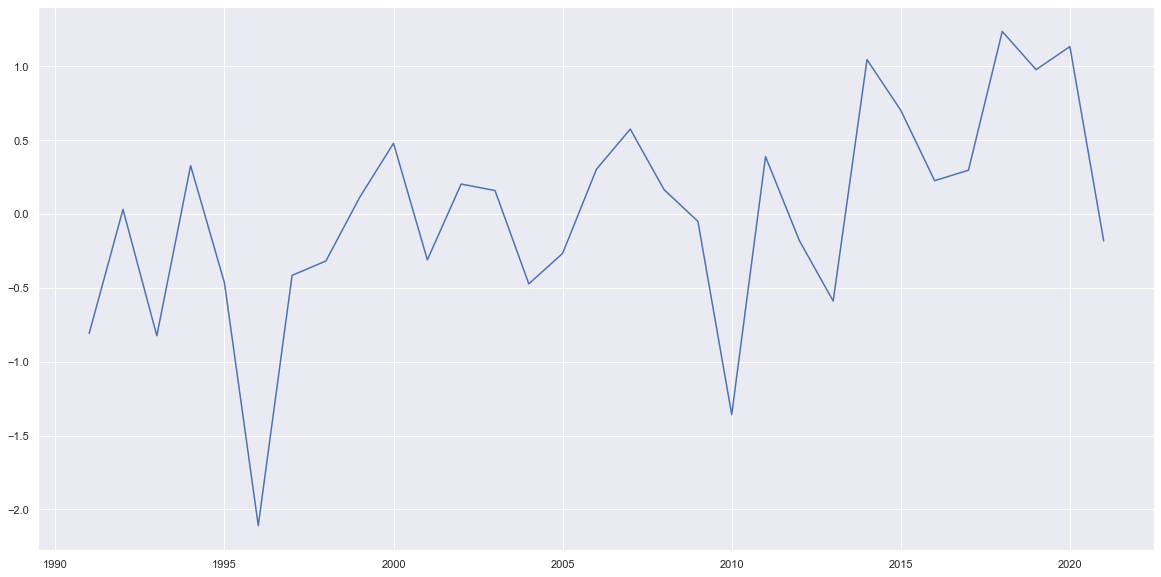

In [60]:
print("                             PLOTTING THE MEAN ANNUAL TEMPERATURE FROM 1990 TO 2021")
print("                                                          (demeaned) ")
df=amr_panel_temp.groupby(by=["year"]).mean().reset_index()
df['demeaned']=df['TMK']-np.mean(df['TMK'])
years=[1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
fig,ax=plt.subplots(figsize=(20,10))
ax.plot(years,df['demeaned'])
plt.show()

                             PLOTTING THE MEAN TEMPERATURE IN EVERY MONTH YEAR FROM 1991 TO 2021
                                                          (demeaned) 


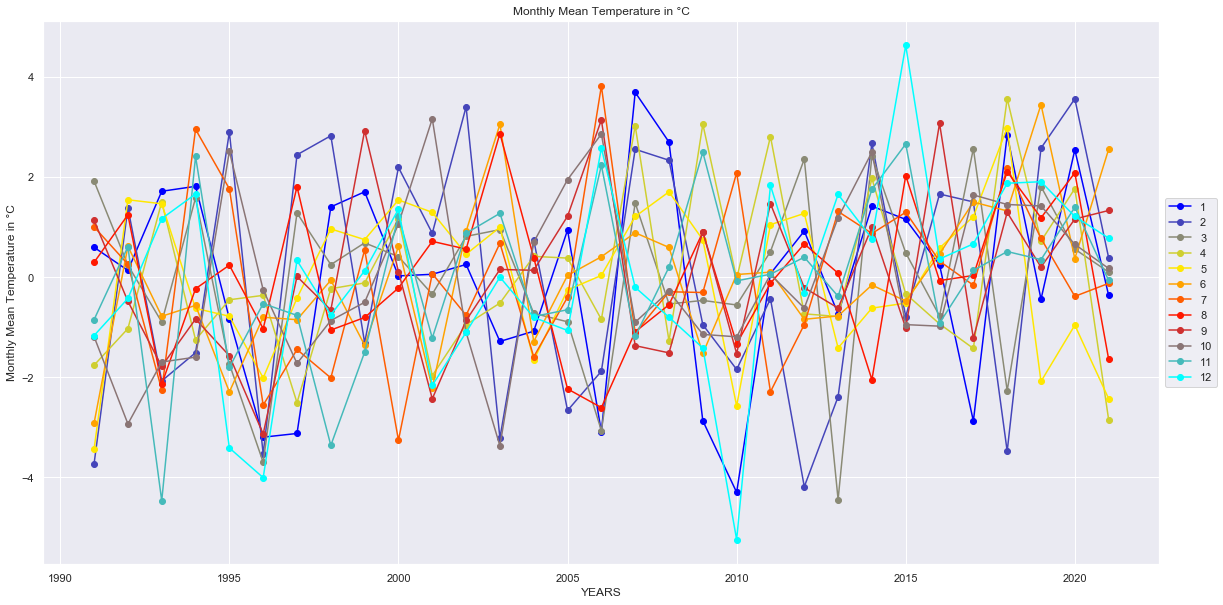

In [41]:
print("                             PLOTTING THE MEAN TEMPERATURE IN EVERY MONTH YEAR FROM 1991 TO 2021")
print("                                                          (demeaned) ")
df=amr_panel_temp.groupby(by=["year","month"]).mean().reset_index()
years=[1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
cmap=sns.blend_palette(colors=["blue","yellow","red","cyan"],n_colors=12)
fig,ax=plt.subplots(figsize=(20,10))
sns.set_theme(style="darkgrid")
for i in range(12):
    tdf=pd.DataFrame(df[df["month"]==(i+1)]["TMK"])
    tdf['demeaned']=tdf['TMK']-np.mean(tdf['TMK'])
    ax.plot(years,tdf['demeaned'],marker="o",label=str(i+1),color=cmap[i])
plt.xlabel("YEARS")
plt.ylabel("Monthly Mean Temperature in °C")
plt.title("Monthly Mean Temperature in °C")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

## DAILY PRECIPITATION DATA

In [62]:
weatherog=pd.read_csv("precdfv1.csv")
weatherog.shape

(1930156, 6)

In [63]:
weatherog.columns

Index(['STATIONS_ID', 'MESS_DATUM', 'QN_3', 'AMR_key', 'RSK', 'RSKF'], dtype='object')

In [64]:
#the og data has the station level data, to convert this to AMR level data, first take average of precipitation 
#over all stations in every AMR.
amr_panel_prec=weatherog.groupby(by=["AMR_key","MESS_DATUM"]).mean().drop(["STATIONS_ID","QN_3"],axis=1)
amr_panel_prec_dims=amr_panel_prec.groupby(by="AMR_key").count() #gives number of observations in every AMR
print(amr_panel_prec.shape)
amr_panel_prec.reset_index(inplace=True)

(519075, 2)


In [65]:
print("There are ",amr_panel_prec_dims.shape[0]," Labour Market Regions in the Precipitation Data" )

There are  47  Labour Market Regions in the Precipitation Data


In [66]:
amr_panel_prec["year"]=(amr_panel_prec["MESS_DATUM"]/10000).astype(int)
amr_panel_prec["month"]=((amr_panel_prec["MESS_DATUM"]%10000)/100).astype(int)
amr_panel_prec["day_of_year"]=amr_panel_prec.groupby(by=["AMR_key","year"]).cumcount()+1
print("The Years in the Data: ",set(amr_panel_prec["year"]))
print("The Month in the Data: ",set(amr_panel_prec["month"]))
print("The columns in the Data: ",list(amr_panel_prec.columns))

The Years in the Data:  {1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021}
The Month in the Data:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
The columns in the Data:  ['AMR_key', 'MESS_DATUM', 'RSK', 'RSKF', 'year', 'month', 'day_of_year']


                             PLOTTING THE MEAN ANNUAL PRECIPITATION FROM 1990 TO 2021
                                                          (demeaned) 


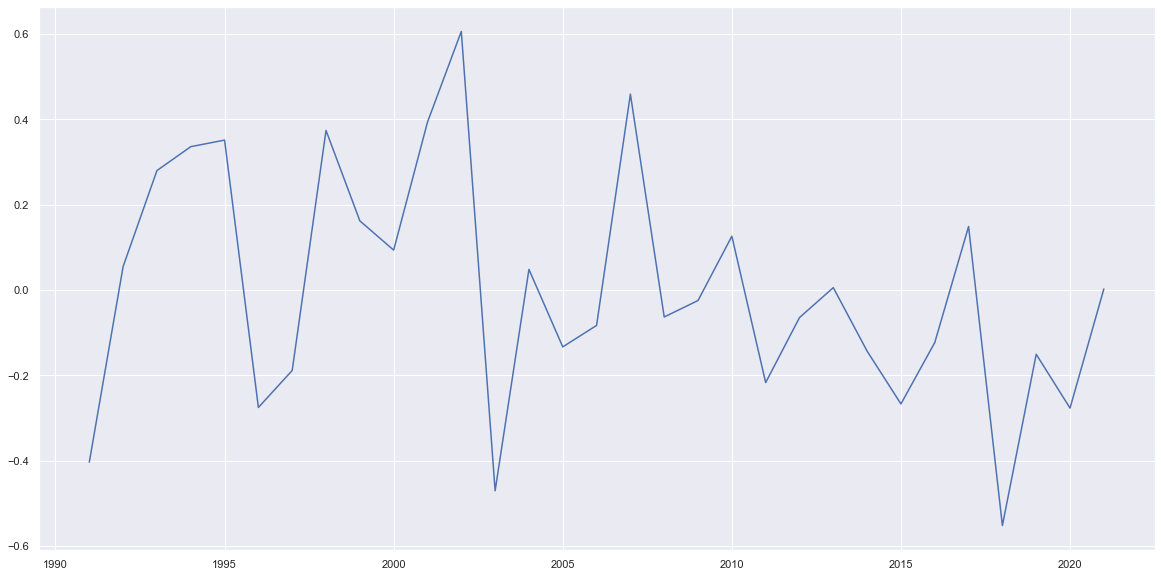

In [68]:
print("                             PLOTTING THE MEAN ANNUAL PRECIPITATION FROM 1990 TO 2021")
print("                                                          (demeaned) ")
df=amr_panel_prec.groupby(by=["year"]).mean().reset_index()
df['demeaned']=df['RSK']-np.mean(df['RSK'])
years=[1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
fig,ax=plt.subplots(figsize=(20,10))
ax.plot(years,df['demeaned'])
plt.show()

                             PLOTTING THE MEAN PRECIPITATION IN EVERY MONTH YEAR FROM 1991 TO 2021
                                                          (demeaned) 


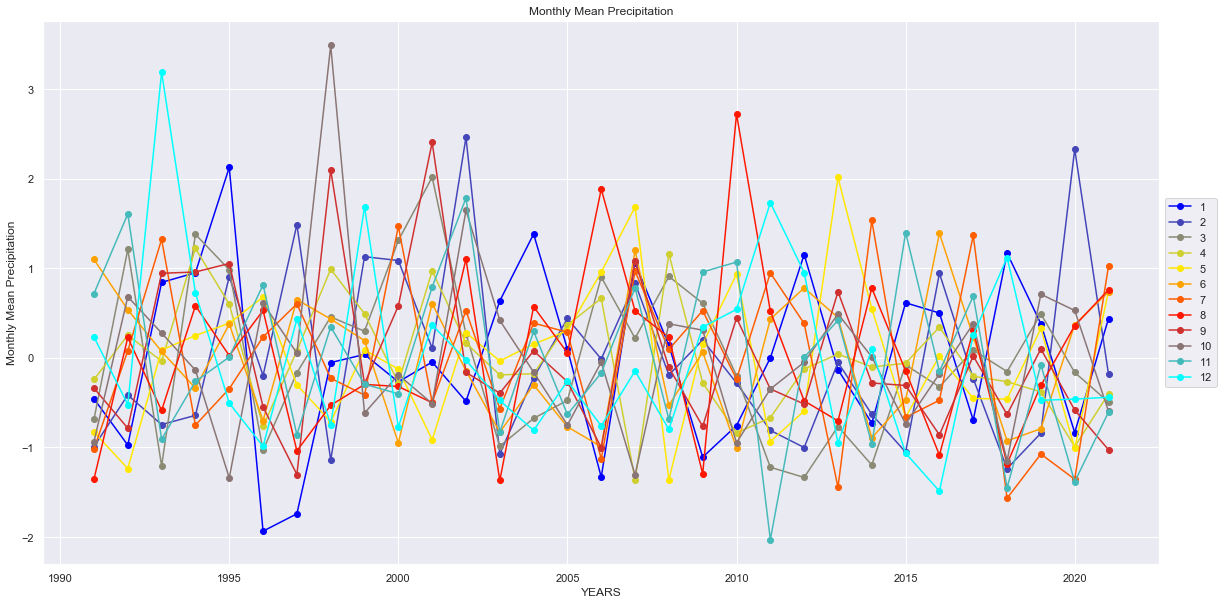

In [69]:
print("                             PLOTTING THE MEAN PRECIPITATION IN EVERY MONTH YEAR FROM 1991 TO 2021")
print("                                                          (demeaned) ")
df=amr_panel_prec.groupby(by=["year","month"]).mean().reset_index()
years=[1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
cmap=sns.blend_palette(colors=["blue","yellow","red","cyan"],n_colors=12)
fig,ax=plt.subplots(figsize=(20,10))
sns.set_theme(style="darkgrid")
for i in range(12):
    tdf=pd.DataFrame(df[df["month"]==(i+1)]["RSK"])
    tdf['demeaned']=tdf['RSK']-np.mean(tdf['RSK'])
    ax.plot(years,tdf['demeaned'],marker="o",label=str(i+1),color=cmap[i])
plt.xlabel("YEARS")
plt.ylabel("Monthly Mean Precipitation")
plt.title("Monthly Mean Precipitation")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

## DAILY WIND DATA

In [14]:
weatherog=pd.read_csv("winddfv1.csv")
weatherog.shape

(2311972, 6)

In [15]:
weatherog.columns

Index(['STATIONS_ID', 'MESS_DATUM', 'QN_3', 'AMR_key', 'FX', 'FM'], dtype='object')

In [16]:
#the og data has the station level data, to convert this to AMR level data, first take average of temperature 
#over all stations in every AMR.
amr_panel_wind=weatherog.groupby(by=["AMR_key","MESS_DATUM"]).mean().drop(["STATIONS_ID","QN_3"],axis=1)
amr_panel_wind_dims=amr_panel_wind.groupby(by="AMR_key").count() #gives number of observations in every AMR
print(amr_panel_wind.shape)
amr_panel_wind.reset_index(inplace=True)

(523896, 2)


In [17]:
print("There are ",amr_panel_wind_dims.shape[0]," Labour Market Regions in the Wind Data" )

There are  47  Labour Market Regions in the Wind Data


In [18]:
amr_panel_wind["year"]=(amr_panel_wind["MESS_DATUM"]/10000).astype(int)
amr_panel_wind["month"]=((amr_panel_wind["MESS_DATUM"]%10000)/100).astype(int)
amr_panel_wind["day_of_year"]=amr_panel_wind.groupby(by=["AMR_key","year"]).cumcount()+1
print("The Years in the Data: ",set(amr_panel_wind["year"]))
print("The Month in the Data: ",set(amr_panel_wind["month"]))
print("The columns in the Data: ",list(amr_panel_wind.columns))

The Years in the Data:  {1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021}
The Month in the Data:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
The columns in the Data:  ['AMR_key', 'MESS_DATUM', 'FX', 'FM', 'year', 'month', 'day_of_year']


                             PLOTTING THE MEAN ANNUAL WIND SPEED FROM 1990 TO 2021
                                                          (demeaned) 


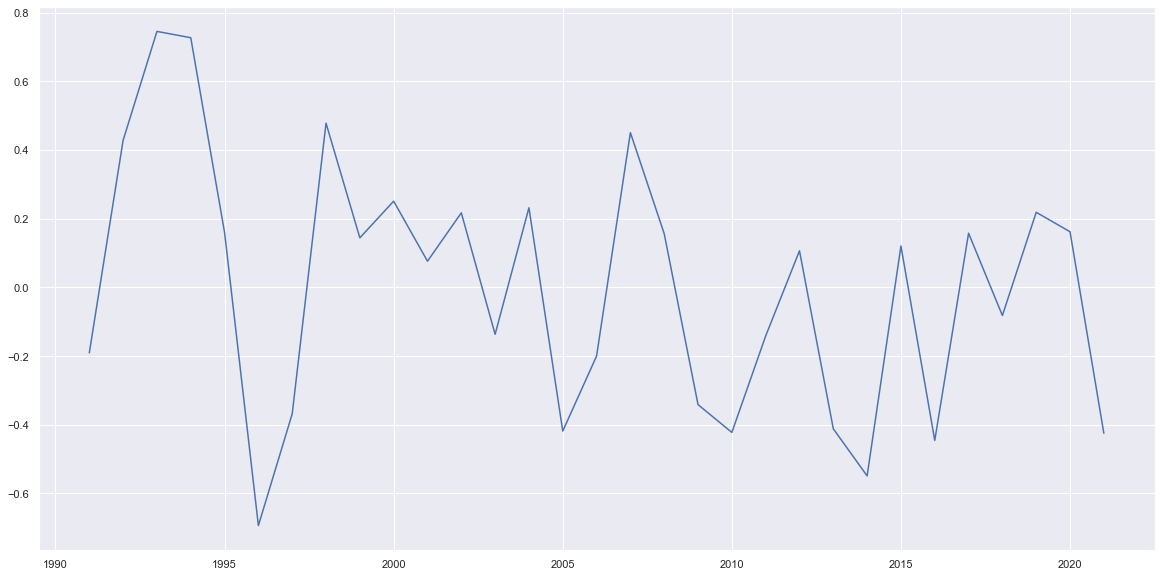

In [70]:
print("                             PLOTTING THE MEAN ANNUAL WIND SPEED FROM 1990 TO 2021")
print("                                                          (demeaned) ")
df=amr_panel_wind.groupby(by=["year"]).mean().reset_index()
df['demeaned']=df['FX']-np.mean(df['FX'])
years=[1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
fig,ax=plt.subplots(figsize=(20,10))
ax.plot(years,df['demeaned'])
plt.show()

                             PLOTTING THE MAXIMUM WIND SPEED IN EVERY MONTH YEAR FROM 1991 TO 2021
                                                          (demeaned) 


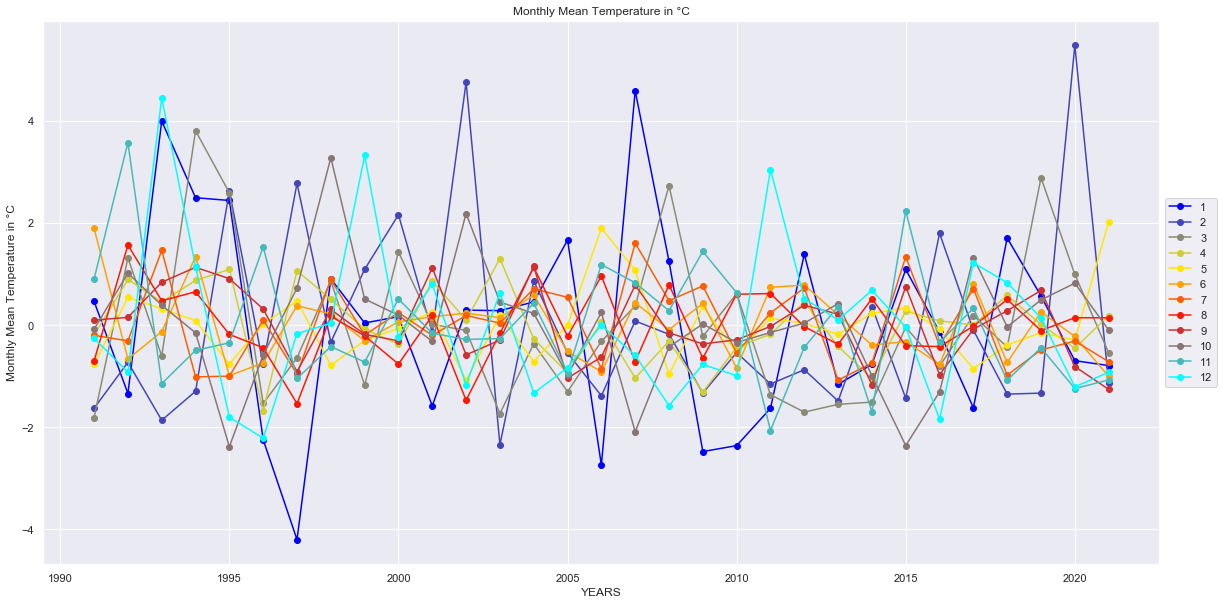

In [52]:
print("                             PLOTTING THE MAXIMUM WIND SPEED IN EVERY MONTH YEAR FROM 1991 TO 2021")
print("                                                          (demeaned) ")
df=amr_panel_wind.groupby(by=["year","month"]).mean().reset_index()
years=[1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
cmap=sns.blend_palette(colors=["blue","yellow","red","cyan"],n_colors=12)
fig,ax=plt.subplots(figsize=(20,10))
sns.set_theme(style="darkgrid")
for i in range(12):
    tdf=pd.DataFrame(df[df["month"]==(i+1)]["FX"])
    tdf['demeaned']=tdf['FX']-np.mean(tdf['FX'])
    ax.plot(years,tdf['demeaned'],marker="o",label=str(i+1),color=cmap[i])
plt.xlabel("YEARS")
plt.ylabel("Monthly Mean Temperature in °C")
plt.title("Monthly Mean Temperature in °C")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

## DAILY TEMPERATURE DATA FROM 1900

In [20]:
weatherog=pd.read_csv("tempdfv1900.csv").drop("Unnamed: 0",axis=1)
weatherog.shape

(3185718, 8)

In [21]:
weatherog.columns

Index(['STATIONS_ID', 'MESS_DATUM', 'QN_3', 'Stationsname', 'AMR_key', 'TMK',
       'TXK', 'TNK'],
      dtype='object')

In [22]:
#the og data has the station level data, to convert this to AMR level data, first take average of temperature 
#over all stations in every AMR.
amr_panel_temp00=weatherog.groupby(by=["AMR_key","MESS_DATUM"]).mean().drop(["STATIONS_ID","QN_3"],axis=1)
amr_panel_temp00_dims=amr_panel_temp00.groupby(by="AMR_key").count() #gives number of observations in every AMR
print(amr_panel_temp00.shape)
amr_panel_temp00.reset_index(inplace=True)

(1065632, 3)


In [23]:
print("There are ",amr_panel_temp00_dims.shape[0]," Labour Market Regions in the Temperature Data" )

There are  47  Labour Market Regions in the Temperature Data


In [24]:
amr_panel_temp00["year"]=(amr_panel_temp00["MESS_DATUM"]/10000).astype(int)
amr_panel_temp00["month"]=((amr_panel_temp00["MESS_DATUM"]%10000)/100).astype(int)
amr_panel_temp00["day_of_year"]=amr_panel_temp00.groupby(by=["AMR_key","year"]).cumcount()+1
print("The Years in the Data: ",set(amr_panel_temp00["year"]))
print("The Month in the Data: ",set(amr_panel_temp00["month"]))
print("The columns in the Data: ",list(amr_panel_temp00.columns))

The Years in the Data:  {1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021}
The Month in the Data:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
The columns in the Data:  ['AMR_key', 'MESS_DATUM', 'TMK', 'TXK', 'TNK', 'year', 'month', 'day_of_year']


                             PLOTTING THE MEAN ANNUAL TEMPERATURE FROM 1900 TO 2021
                                                          (demeaned) 


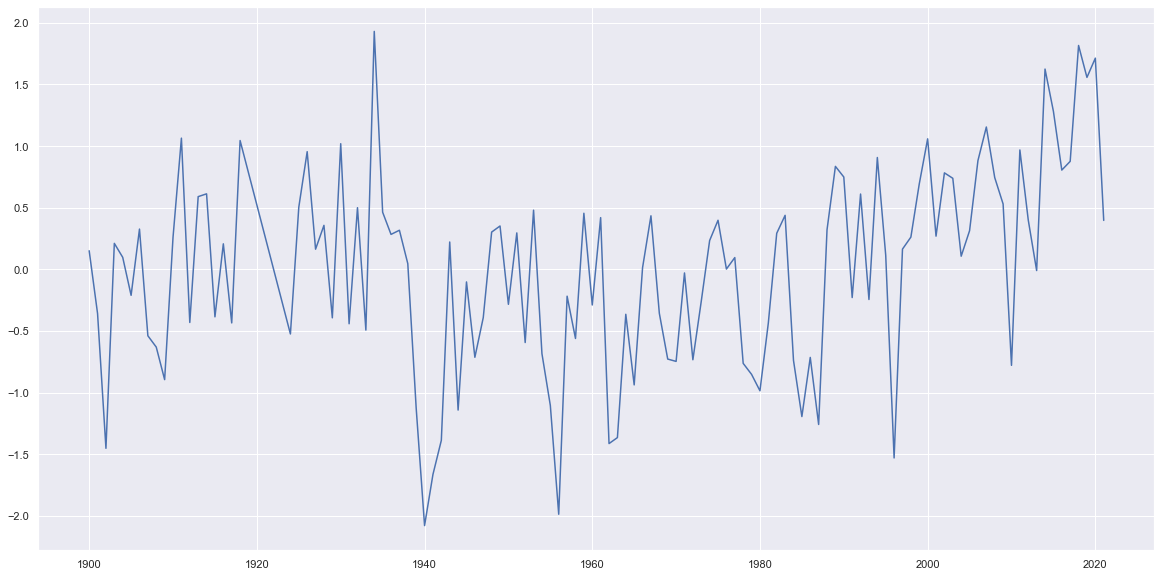

In [59]:
print("                             PLOTTING THE MEAN ANNUAL TEMPERATURE FROM 1900 TO 2021")
print("                                                          (demeaned) ")
df=amr_panel_temp00.groupby(by=["year"]).mean().reset_index()
df['demeaned']=df['TMK']-np.mean(df['TMK'])
years=[1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1924, 1925, 1926, 1927, 1928, 
       1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 
       1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 
       1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

fig,ax=plt.subplots(figsize=(20,10))
ax.plot(years,df['demeaned'])
plt.show()

                             PLOTTING THE MEAN TEMPERATURE IN EVERY MONTH YEAR FROM 1900 TO 2021
                                                          (demeaned) 


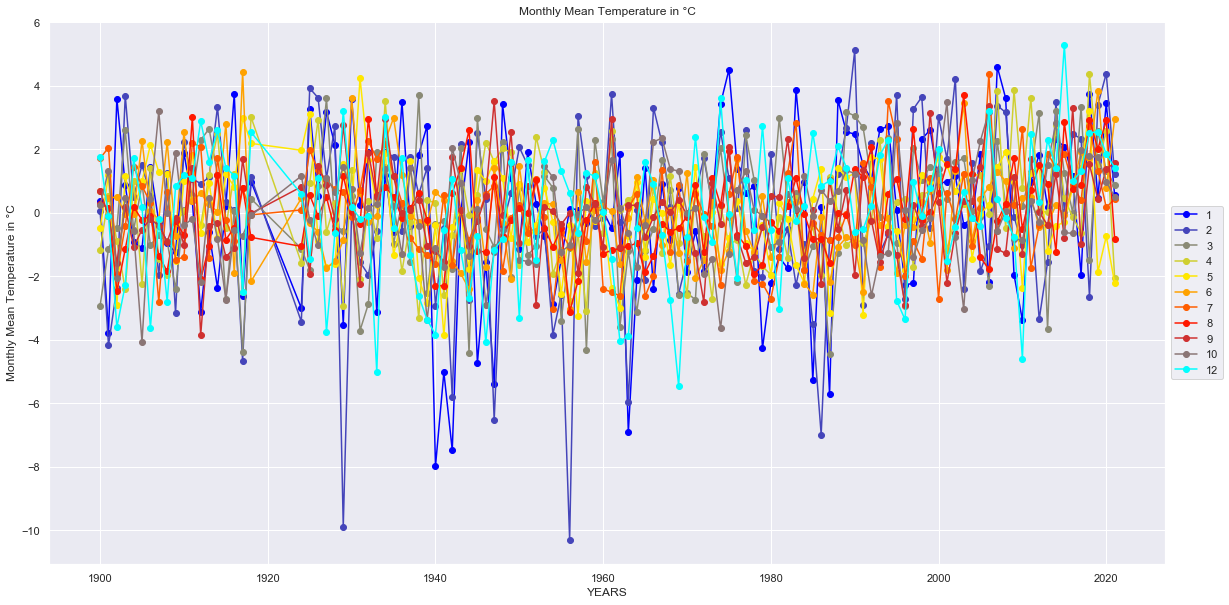

In [71]:
print("                             PLOTTING THE MEAN TEMPERATURE IN EVERY MONTH YEAR FROM 1900 TO 2021")
print("                                                          (demeaned) ")
df=amr_panel_temp00.groupby(by=["year","month"]).mean().reset_index()
years=[1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1924, 1925, 1926, 1927, 1928, 
       1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 
       1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 
       1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
cmap=sns.blend_palette(colors=["blue","yellow","red","cyan"],n_colors=12)
fig,ax=plt.subplots(figsize=(20,10))
sns.set_theme(style="darkgrid")
for i in range(12):
    try:
        tdf=pd.DataFrame(df[df["month"]==(i+1)]["TMK"])
        tdf['demeaned']=tdf['TMK']-np.mean(tdf['TMK'])
        ax.plot(years,tdf['demeaned'],marker="o",label=str(i+1),color=cmap[i])
    except:
        a=0
plt.xlabel("YEARS")
plt.ylabel("Monthly Mean Temperature in °C")
plt.title("Monthly Mean Temperature in °C")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

In [26]:
for i in range(12):
    print(i+1,': ',df[df['month']==(i+1)].shape)

1 :  (117, 8)
2 :  (117, 8)
3 :  (117, 8)
4 :  (117, 8)
5 :  (117, 8)
6 :  (117, 8)
7 :  (117, 8)
8 :  (117, 8)
9 :  (117, 8)
10 :  (117, 8)
11 :  (116, 8)
12 :  (117, 8)


In [75]:
for yy in years:
    if yy not in list(df['year']): print(yy)

In [76]:
len(years)

117